In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [116]:
countries = pd.read_csv('countries_of_the_world.csv')

In [117]:
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [118]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

In [119]:
countries.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [120]:
len(countries[countries.isna().any(axis = 1)]) # number of rows which have null values


48

In [121]:
countries_clean = countries.drop(columns = ['Literacy (%)','Phones (per 1000)','Climate'])

In [122]:
countries_clean.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [123]:
countries_clean[countries_clean.isna().any(axis =1)]  # no body cares about this countries

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,10,15,75,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"2,22",0,"97,78","8,71","6,25",NaN,NaN,NaN
47,Cook Islands,OCEANIA,21388,240,"89,1","50,00",NaN,NaN,5000.0,"17,39","13,04","69,57",21,NaN,"0,151","0,096","0,753"
78,Gibraltar,WESTERN EUROPE,27928,7,"3989,7","171,43",0,"5,13",17500.0,0,0,100,"10,74","9,31",NaN,NaN,NaN
80,Greenland,NORTHERN AMERICA,56361,2166086,"0,0","2,04","-8,37","15,82",20000.0,0,0,100,"15,93","7,84",NaN,NaN,NaN
83,Guam,OCEANIA,171019,541,"316,1","23,20",0,"6,94",21000.0,"9,09","16,36","74,55","18,79","4,48",NaN,NaN,NaN
85,Guernsey,WESTERN EUROPE,65409,78,"838,6","64,10","3,84","4,71",20000.0,NaN,NaN,NaN,"8,81","10,01","0,03","0,1","0,87"
134,Mayotte,SUB-SAHARAN AFRICA,201234,374,"538,1","49,52","6,78","62,4",2600.0,NaN,NaN,NaN,"40,95","7,7",NaN,NaN,NaN
138,Monaco,WESTERN EUROPE,32543,2,"16271,5","205,00","7,75","5,43",27000.0,0,0,100,"9,19","12,91","0,17",NaN,NaN
140,Montserrat,LATIN AMER. & CARIB,9439,102,"92,5","39,22",0,"7,35",3400.0,20,0,80,"17,59","7,1",NaN,NaN,NaN


In [124]:
countries_clean = countries_clean.dropna()

In [125]:
countries_clean.isnull().any().any()

False

In [126]:
len(countries_clean['Region'].unique()) # there are 11 unique countries

11

In [127]:
countries_clean['Region'].count() # length of the dependent column

208

In [128]:
countries_clean['Region'].value_counts()

SUB-SAHARAN AFRICA                     49
LATIN AMER. & CARIB                    43
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         23
NEAR EAST                              16
OCEANIA                                15
C.W. OF IND. STATES                    12
EASTERN EUROPE                         11
NORTHERN AFRICA                         5
NORTHERN AMERICA                        3
BALTICS                                 3
Name: Region, dtype: int64

In [129]:
array = ['Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)','Net migration', 'Infant mortality (per 1000 births)','GDP ($ per capita)', 'Arable (%)', 'Crops (%)', 'Other (%)','Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']


In [130]:
for val in array:
    countries_clean[val] = countries_clean[val].astype(str).str.replace(',','.').astype(float)
    

In [133]:
countries_clean['Region'] = countries_clean['Region'].apply(lambda x : x.strip())

In [135]:
countries_clean['Region'].unique()

array(['ASIA (EX. NEAR EAST)', 'EASTERN EUROPE', 'NORTHERN AFRICA',
       'SUB-SAHARAN AFRICA', 'LATIN AMER. & CARIB', 'C.W. OF IND. STATES',
       'OCEANIA', 'WESTERN EUROPE', 'NEAR EAST', 'NORTHERN AMERICA',
       'BALTICS'], dtype=object)

In [136]:
countries_clean['Region'] = countries_clean['Region'].replace({'ASIA (EX. NEAR EAST)':'asia',
                                                               'EASTERN EUROPE':'europe', 
                                                               'NORTHERN AFRICA':'africa',
       
                                                               'SUB-SAHARAN AFRICA':'africa', 
                                                               'LATIN AMER. & CARIB':'south_america',
                                                               'C.W. OF IND. STATES':'asia',
       
                                                               'OCEANIA':'ocenia', 
                                                               'WESTERN EUROPE':'europe', 
                                                               'NEAR EAST':'asia', 
                                                               'NORTHERN AMERICA':'north_america',
       
                                                               'BALTICS':'europe'})

In [137]:
countries_clean

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,asia,31056997,647500,48.0,0.00,23.06,163.07,700.0,12.13,0.22,87.65,46.60,20.34,0.380,0.240,0.380
1,Albania,europe,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,21.09,4.42,74.49,15.11,5.22,0.232,0.188,0.579
2,Algeria,africa,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,3.22,0.25,96.53,17.14,4.61,0.101,0.600,0.298
5,Angola,africa,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,2.41,0.24,97.35,45.11,24.20,0.096,0.658,0.246
6,Anguilla,south_america,13477,102,132.1,59.80,10.76,21.03,8600.0,0.00,0.00,100.00,14.17,5.34,0.040,0.180,0.780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Virgin Islands,south_america,108605,1910,56.9,9.84,-8.94,8.03,17200.0,11.76,2.94,85.30,13.96,6.43,0.010,0.190,0.800
222,West Bank,asia,2460492,5860,419.9,0.00,2.98,19.62,800.0,16.90,18.97,64.13,31.67,3.92,0.090,0.280,0.630
224,Yemen,asia,21456188,527970,40.6,0.36,0.00,61.50,800.0,2.78,0.24,96.98,42.89,8.30,0.135,0.472,0.393
225,Zambia,africa,11502010,752614,15.3,0.00,0.00,88.29,800.0,7.08,0.03,92.90,41.00,19.93,0.220,0.290,0.489


In [139]:
# getting all the numeric data
from scipy.stats import skew
numerical_features_mask = countries_clean.dtypes != 'object'
numerical_columns = countries_clean.columns[numerical_features_mask].tolist()
skewness_of_columns = countries_clean[numerical_columns].apply(lambda x : skew(x.dropna()))

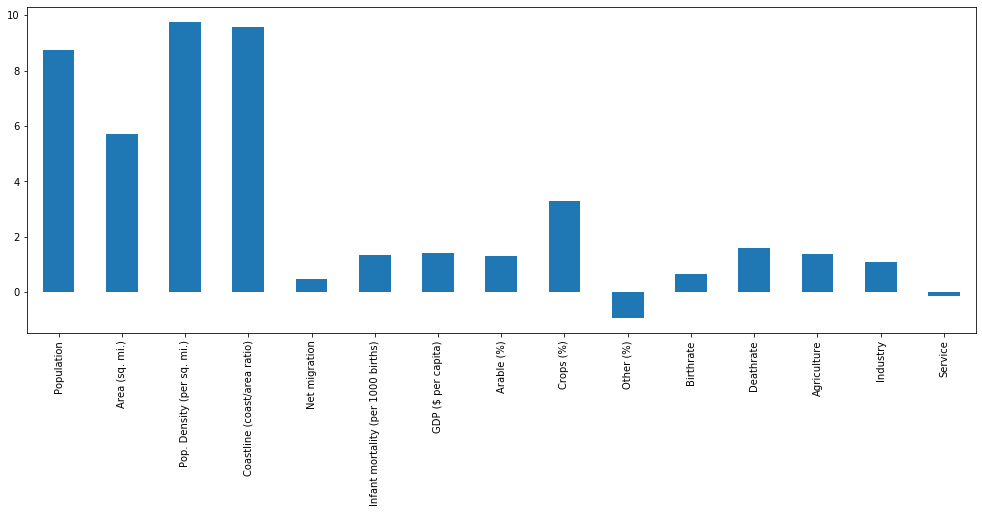

In [140]:
plt.figure(figsize = (17,6))
skewness_of_columns.plot(kind = 'bar')


In [141]:
# lets keep a limit of 0.75 for our data skewness
skewness_of_columns = skewness_of_columns[abs(skewness_of_columns) > 0.25]

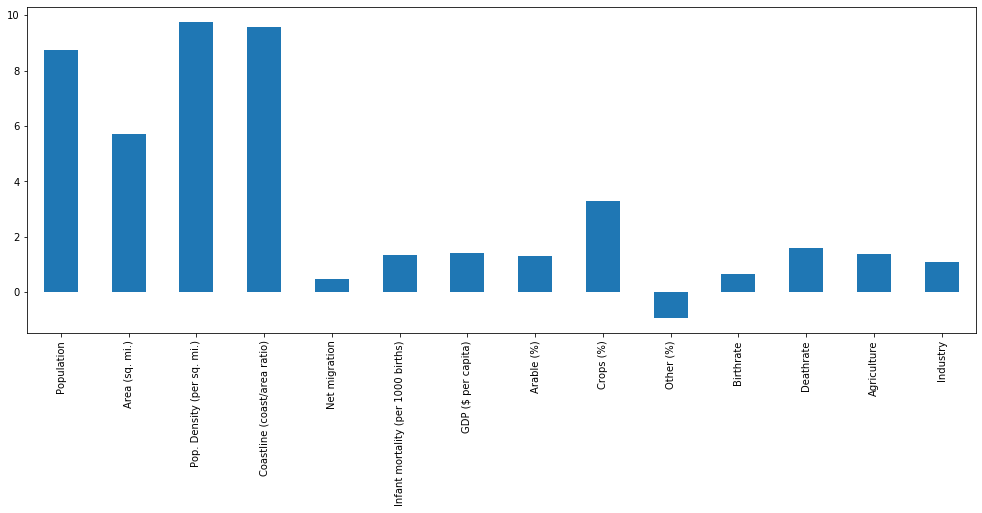

In [142]:
plt.figure(figsize = (17,6))
skewness_of_columns.plot(kind = 'bar')

In [143]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
countries_clean[skewness_of_columns.index] = pt.fit_transform(countries_clean[skewness_of_columns.index])

In [146]:
skewness_of_columns_new = countries_clean[skewness_of_columns.index].apply(lambda x : skew(x))

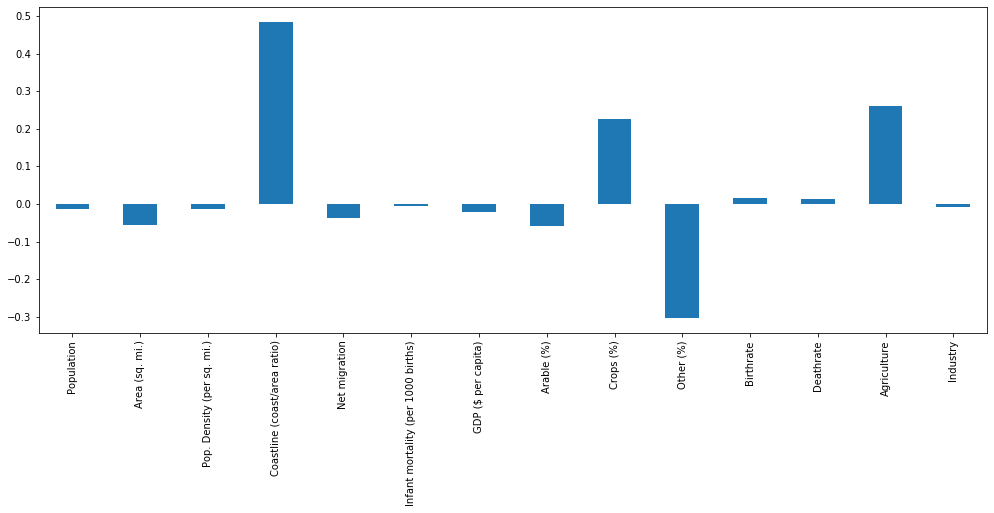

In [148]:
plt.figure(figsize = (17,6))
skewness_of_columns_new.plot(kind = 'bar')

In [149]:
countries_clean

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,asia,0.890247,0.853256,-0.237259,-1.066106,4.733789,1.923897,-1.589937,0.193566,-0.976834,0.273096,1.665483,1.742315,1.486555,-0.210366,0.380
1,Albania,europe,-0.139422,-0.397568,0.407668,0.056489,-1.092643,-0.073991,-0.118839,0.774526,0.823452,-0.647819,-0.529193,-0.988046,0.904443,-0.683553,0.579
2,Algeria,africa,0.920277,1.501719,-1.102166,-0.999098,-0.047117,0.275295,0.119745,-0.875559,-0.935443,1.069824,-0.278511,-1.280330,-0.100572,1.931411,0.298
5,Angola,africa,0.423720,1.169006,-1.345478,-0.862228,0.039458,2.085527,-0.815819,-1.049655,-0.949073,1.151132,1.603977,2.021747,-0.154140,2.156273,0.246
6,Anguilla,south_america,-2.206090,-1.879227,0.446432,1.637717,2.277909,-0.095803,0.422645,-1.914683,-1.335282,1.423224,-0.657180,-0.935187,-0.866202,-0.761766,0.780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Virgin Islands,south_america,-1.521847,-1.213375,-0.120705,1.165137,-2.043370,-0.974247,1.019690,0.163430,0.542756,0.086851,-0.686952,-0.510906,-1.351120,-0.664238,0.800
222,West Bank,asia,-0.303782,-0.902369,1.193317,-1.066106,0.677940,-0.161342,-1.488434,0.532055,1.600475,-1.181125,0.926502,-1.668981,-0.220361,0.116274,0.630
224,Yemen,asia,0.703291,0.758999,-0.352534,-0.579467,0.039458,0.945765,-1.488434,-0.966470,-0.949073,1.114277,1.508210,0.047228,0.228176,1.341325,0.393
225,Zambia,africa,0.398325,0.923963,-1.030507,-1.066106,0.039458,1.305704,-1.488434,-0.294761,-1.279712,0.725883,1.422431,1.708541,0.837308,0.193375,0.489


Region
africa           [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
asia             [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
europe           [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
north_america    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
ocenia           [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
south_america    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
dtype: object

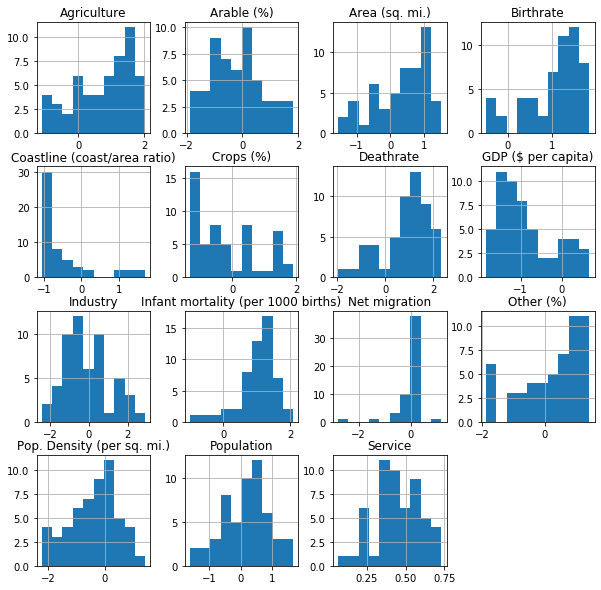

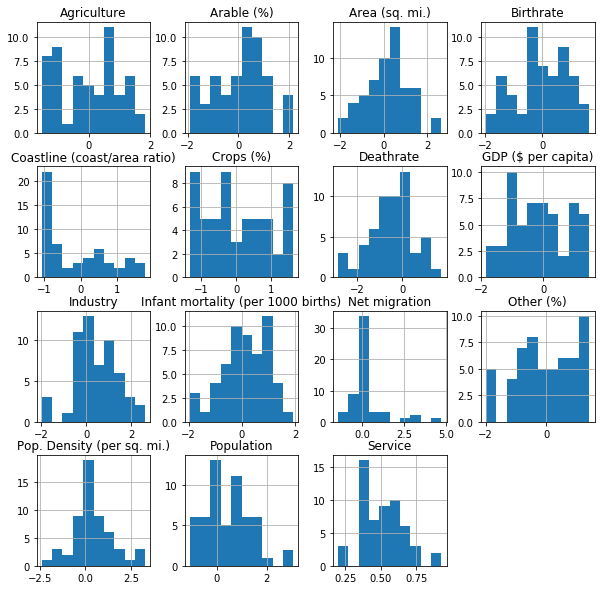

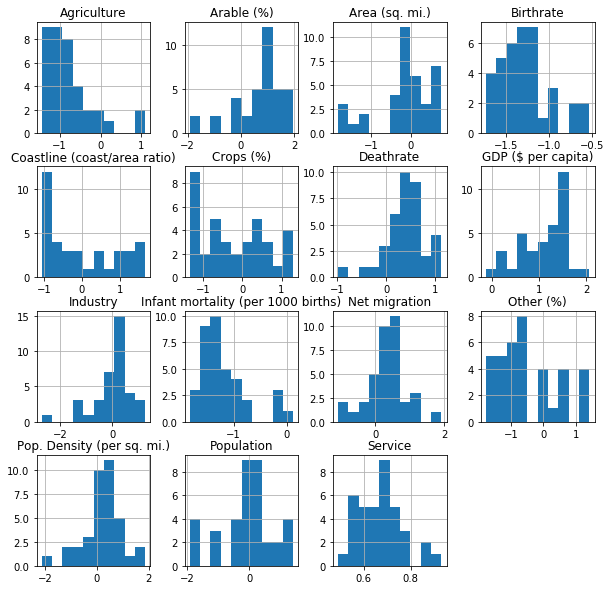

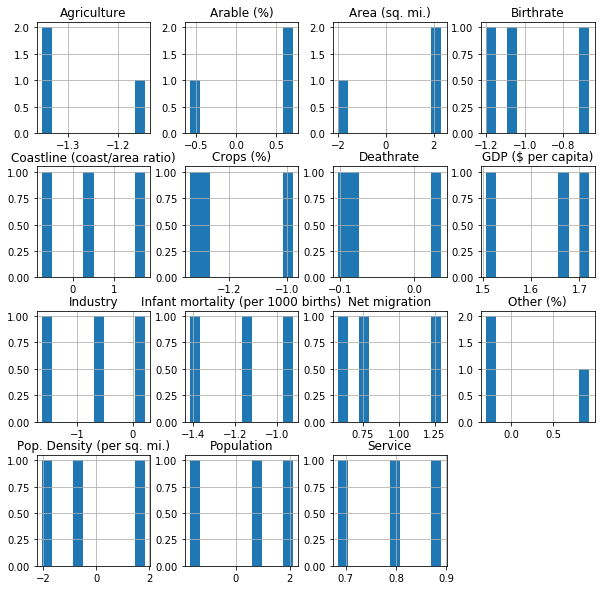

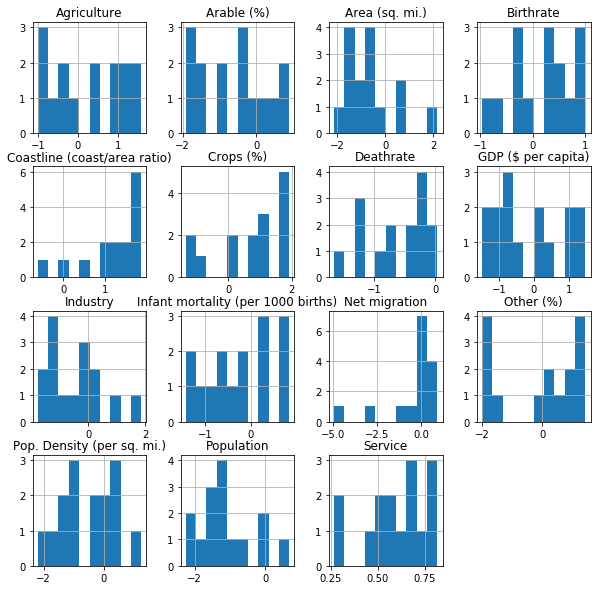

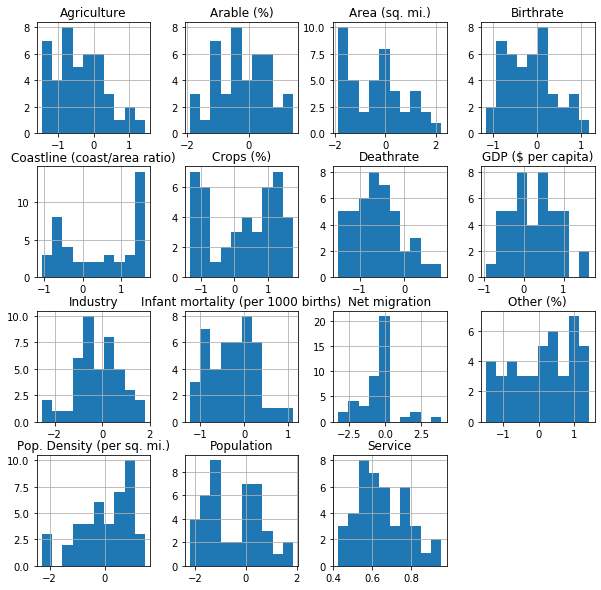

In [155]:
countries_clean.groupby('Region').hist(figsize = (10,10))


In [156]:
#we need to handel missing data
#categorical boolean mask
categorical_feature_mask = countries_clean.dtypes == object
#filter categoracal columns using mask and turn it into a list
categorical_columns = countries_clean.columns[categorical_feature_mask].tolist()
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
countries_clean[categorical_columns] = countries_clean[categorical_columns].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [158]:
countries_clean.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Arable (%)', 'Crops (%)', 'Other (%)',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [163]:
X = countries_clean[['Country', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Arable (%)', 'Crops (%)', 'Other (%)',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']].values

In [173]:
y = countries_clean['Region'].values.ravel()

In [224]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.06)

In [225]:
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [226]:
y_pred = classifier.predict(X_test)

In [227]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.75      0.86         4
           2       0.60      0.75      0.67         4
           3       0.00      0.00      0.00         1
           5       0.50      0.67      0.57         3

   micro avg       0.69      0.69      0.69        13
   macro avg       0.62      0.63      0.62        13
weighted avg       0.68      0.69      0.68        13



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [228]:
accuracy_score(y_pred,y_test)

0.6923076923076923

{}